## Observations and Insights 

## Conclusion of the analysis:

1. All mice started with the same amount of tumor volume (45). Capomulin was the second most effective drug considering both mean and median of the tumor volume for capomulin. However, the first and second most effective drugs have almost identical results. Also for capomulin, standard deviation was second smallest (24.9) in the group. This means that drug effect was consistent. Standard Error of mean was also second smallest(0.32). That indicates that sample size was decent and standard deviation was small. 

2. Capomulin(second best) and Ramicane(best) are the drugs that have most testing numbers. That could be affected their results. It is interesting to see how other drugs would do if they had the same amount of testing numbers as Capomulin(second best) and Ramicane(best).

3. Looking at the mouse b128's result, there was significant drop in its tumor volume on the 35th day. It could imply that the result would be dramatic arount that timeline. Further analysis is required. 

4. There is a strong positive correlation between weigth and tumor volume. This could mean that the drugs are less effective on overweigth mice. 

In [17]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=pd.merge(study_results, mouse_metadata, how='outer', on ="Mouse ID" )
# Display the data table for preview
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [18]:
profile = ProfileReport(complete_data , title="Pandas Profiling Report")
#profile

In [19]:
# Checking the number of mice.
number_of_mice_ID=len(complete_data['Mouse ID'].unique())
number_of_mice_ID

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=complete_data.loc[ complete_data.duplicated() == True, [ 'Mouse ID', 'Timepoint' ] ]
duplicates

,Mouse ID,Timepoint
861,g989,0


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates=complete_data.loc[ complete_data["Mouse ID"] == 'g989' , :]
duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=complete_data.drop_duplicates()


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_data.duplicated().any()

False

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_by_regimen_mean=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean() 
grouped_by_regimen_median=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median() 
grouped_by_regimen_var=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var() 
grouped_by_regimen_std=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std() 
grouped_by_regimen_sem=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem() 
grouped_by_regimen1=pd.merge(grouped_by_regimen_mean, grouped_by_regimen_median, on='Drug Regimen', suffixes =('_mean','_median')).merge(grouped_by_regimen_var, on='Drug Regimen').merge(grouped_by_regimen_std, on='Drug Regimen').merge(grouped_by_regimen_sem,on='Drug Regimen' ) 
grouped_by_regimen1=grouped_by_regimen1.rename(columns={'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3)_var', 'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)_std', 'Tumor Volume (mm3)' : 'Tumor Volume (mm3)_sem'})  
grouped_by_regimen1


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grouped_by_regimen2=clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var', 'std', 'sem']})

grouped_by_regimen2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

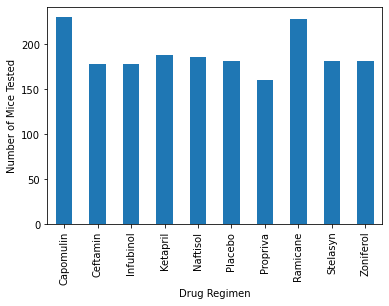

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_number_timepoints=clean_data.groupby('Drug Regimen')['Timepoint'].count().to_frame().reset_index()
total_number_timepoints
total_number_timepoints_barchart=total_number_timepoints.plot.bar(x="Drug Regimen", y="Timepoint", ylabel= "Number of Mice Tested", legend=False)
total_number_timepoints_barchart


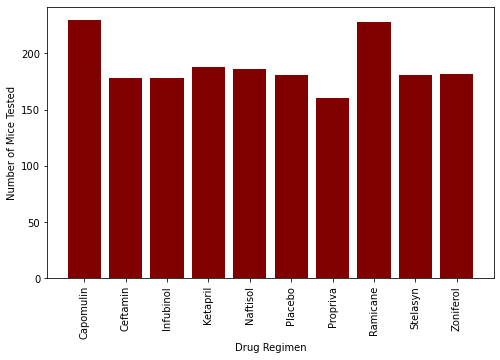

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_number_timepoints=clean_data.groupby('Drug Regimen')['Timepoint'].count().to_frame().reset_index()
total_number_timepoints
drug_regimen=total_number_timepoints["Drug Regimen"]

timepoint=total_number_timepoints["Timepoint"]

fig = plt.figure(figsize = (8, 5))
plt.bar(drug_regimen, timepoint , color ='maroon',
        width = 0.8)

ticklabels=drug_regimen
plt.xticks(ticklabels, rotation=90 )
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



<AxesSubplot:ylabel='Sex'>

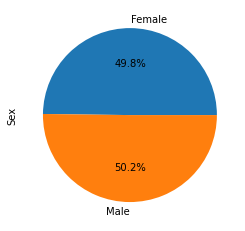

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=clean_data.drop_duplicates('Mouse ID').groupby("Sex")['Mouse ID'].count()


gender_pie_chart=gender.plot(kind='pie', y="Mouse ID", autopct="%1.1f%%", legend=False, ylabel='Sex' )
gender_pie_chart

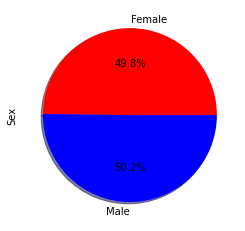

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender.index
sizes = gender.values
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_data.groupby('Mouse ID')['Timepoint'].max().to_frame().reset_index() 
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor=pd.merge(last_timepoint, clean_data, how= "inner", on=["Timepoint", "Mouse ID"])
final_tumor_4drugs = final_tumor.loc[ final_tumor ['Drug Regimen'].isin( ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']), : ]
final_tumor_4drugs =final_tumor_4drugs.reset_index(drop=True)



In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=list(final_tumor_4drugs["Drug Regimen"].unique())

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    final_tumor_by_drug= final_tumor_4drugs.loc[final_tumor_4drugs['Drug Regimen']== treatment, :]

    lowerq=final_tumor_by_drug['Tumor Volume (mm3)'].quantile([.25]).to_frame().reset_index()
    upperq=final_tumor_by_drug['Tumor Volume (mm3)'].quantile([.75]).to_frame().reset_index()
    iqr= upperq['Tumor Volume (mm3)']-lowerq['Tumor Volume (mm3)']
    iqr=iqr.to_frame().reset_index()
      
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_val=final_tumor_by_drug.loc[(final_tumor_by_drug['Tumor Volume (mm3)'] >= upper_bound['Tumor Volume (mm3)'].iloc[0]) | (final_tumor_by_drug['Tumor Volume (mm3)'] <= lower_bound['Tumor Volume (mm3)'].iloc[0]), 'Tumor Volume (mm3)']
    
    print(f"{treatment}'s potential outliers: {outlier_val}'")
    
    tumor_volume_list.append( list(final_tumor_by_drug['Tumor Volume (mm3)']) )



Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64'
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'


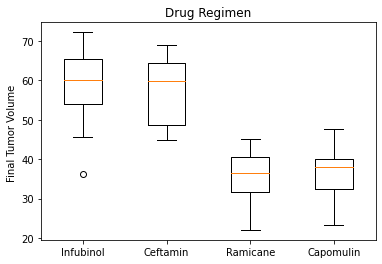

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume ')
plt.boxplot( tumor_volume_list )
plt.xticks([1, 2, 3, 4], treatments)

plt.show() 


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

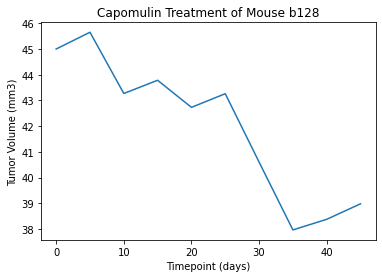

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = clean_data.loc[ clean_data['Drug Regimen'] == 'Capomulin', : ].loc[0, 'Mouse ID']
line_plot_data = clean_data.loc[ ( clean_data['Mouse ID'] == mouse_id ), [ 'Timepoint', 'Tumor Volume (mm3)' ] ]
plt.plot( line_plot_data['Timepoint'], line_plot_data['Tumor Volume (mm3)'] )
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, ' Average Tumor Volume (mm3)')

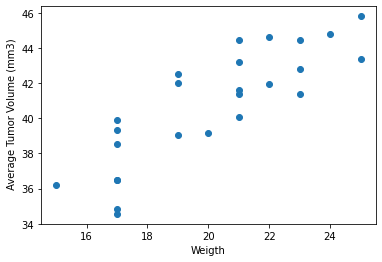

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = clean_data.loc[ clean_data['Drug Regimen'] == 'Capomulin', : ]
Capomulin_agg = Capomulin.groupby( 'Mouse ID' ).agg( {'Weight (g)': 'first', 'Tumor Volume (mm3)': 'mean'} )
plt.scatter( Capomulin_agg['Weight (g)'], Capomulin_agg['Tumor Volume (mm3)'] )
plt.xlabel("Weigth")
plt.ylabel(' Average Tumor Volume (mm3)')

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"Correlation between mouse weigth and tumor volume is {round(st.pearsonr(Capomulin_agg['Weight (g)'], Capomulin_agg['Tumor Volume (mm3)'])[0],2)}.")


Correlation between mouse weigth and tumor volume is 0.84.


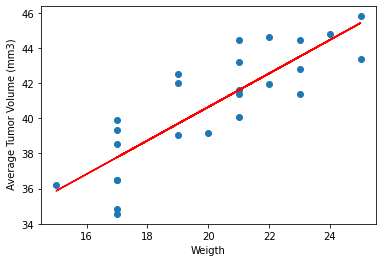

In [39]:
# Add the linear regression equation and line to plot
x_values = Capomulin_agg['Weight (g)']
y_values = Capomulin_agg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weigth")
plt.ylabel(' Average Tumor Volume (mm3)')
plt.show()